# Dependencies

In [16]:
# !pip install -r requirements.txt

In [17]:
# !pip freeze > requirements.txt

In [18]:
!pip freeze

absl-py==1.4.0
anyio==3.6.2
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
astunparse==1.6.3
attrs==22.2.0
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
cachetools==5.3.0
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==3.1.0
click==8.1.3
comm==0.1.2
contourpy==1.0.7
cycler==0.11.0
debugpy==1.6.6
decorator==5.1.1
defusedxml==0.7.1
executing==1.2.0
fastjsonschema==2.16.3
Flask==2.2.3
flatbuffers==1.12
fonttools==4.39.0
fqdn==1.5.1
gast==0.4.0
google-auth==2.16.2
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.51.3
h5py==3.8.0
idna==3.4
importlib-metadata==6.0.0
importlib-resources==5.12.0
ipykernel==6.21.3
ipython==8.10.0
ipython-genutils==0.2.0
ipywidgets==8.0.4
isoduration==20.11.0
itsdangerous==2.1.2
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
jsonpointer==2.3
jsonschema==4.17.3
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.6.3
jupyter_client==8.0.3
jupyter_core==5.2.0
jupyter_server==2.4.0
jupyter_server_termi

# PreProcessing

## Dependencies

In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


## Convert data into numpy array

In [70]:
# import pathlib


test_mask = [] 
test_no_mask = []
# I would do this in a fancy os.loop way but I was using google colab and didn't really want to mess with the function too much
train_data_mask_dir="New_Masks_Dataset/Train/Mask"
train_data_no_mask_dir="New_Masks_Dataset/Train/Non_Mask"
val_data_mask_dir = 'New_Masks_Dataset/Validation/Mask'
val_data_no_mask_dir = 'New_Masks_Dataset/Validation/Non_Mask'
test_data_mask_dir="New_Masks_Dataset/Test/Mask"
test_data_no_mask_dir="New_Masks_Dataset/Test/Non_Mask"


In [21]:
# print(train_imagePaths_mask)

In [72]:
# https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
# https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
import cv2
# from google.colab.patches import cv2_imshow
import os

IMAGE_HEIGHT  = 100
IMAGE_WIDTH = 100
NUM_CLASSES = 2


input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT)


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        # cv2_imshow(img)
        # Has to be like this because of Python Ambiguity
        if img is not None:
            grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gaussian_image = cv2.blur(grayscale,(7,7))
            resized = cv2.resize(gaussian_image, input_shape)
            resized = np.reshape(resized, input_shape[0] * input_shape[1])
            images.append(resized)
    return images


In [73]:
# Train
train_mask = load_images_from_folder(train_data_mask_dir)
train_no_mask = load_images_from_folder(train_data_no_mask_dir)
# Val
val_mask = load_images_from_folder(val_data_mask_dir)
val_no_mask = load_images_from_folder(val_data_no_mask_dir)
# Test
test_mask = load_images_from_folder(test_data_mask_dir)
test_no_mask = (load_images_from_folder(test_data_no_mask_dir))

In [74]:
train_mask += val_mask
train_no_mask += val_no_mask

In [75]:
y_train_mask = [1] * len(train_mask)
y_train_no_mask = [0] * len(train_no_mask)

y_val_mask = [1] * len(val_mask)
y_val_no_mask = [0] * len(val_no_mask)

y_test_mask = [1] * len(test_mask)
y_test_no_mask = [0] * len(test_no_mask)

In [76]:
df_train = pd.DataFrame({'label': y_train_mask,'mask_data': train_mask})

In [77]:
df_train = df_train.append(pd.DataFrame({'label': y_train_no_mask, 'mask_data': train_no_mask}), ignore_index=True)

/var/folders/21/4ybwj4pj54x1sz2qhfgy1b9m0000gn/T/ipykernel_44711/1233198709.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(pd.DataFrame({'label': y_train_no_mask, 'mask_data': train_no_mask}), ignore_index=True)


In [78]:
df_train = df_train.sample(frac = 1)
df_train

,label,mask_data
757,0,"[11, 10, 20, 88, 132, 139, 142, 143, 143, 124,..."
454,0,"[208, 231, 232, 224, 128, 172, 233, 233, 235, ..."
270,1,"[33, 32, 33, 33, 33, 33, 33, 34, 34, 34, 35, 3..."
715,0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
197,1,"[53, 54, 49, 49, 52, 50, 38, 40, 25, 26, 32, 3..."
...,...,...
893,0,"[163, 170, 166, 165, 165, 161, 159, 161, 165, ..."
594,0,"[255, 255, 255, 255, 255, 254, 253, 253, 253, ..."
503,0,"[35, 32, 41, 50, 62, 70, 76, 79, 51, 51, 50, 4..."
235,1,"[35, 6, 11, 20, 27, 41, 48, 50, 56, 66, 65, 68..."


In [79]:
X_train = df_train.iloc[:, 1:] / 255.0
X_train = pd.DataFrame(X_train['mask_data'].tolist())
y_train = df_train.iloc[:, :1]

# .astype('float32')

In [80]:
df_val = pd.DataFrame({'label': y_val_mask,'mask_data': val_mask})
df_val = df_val.append(pd.DataFrame({'label': y_val_no_mask, 'mask_data': val_no_mask}), ignore_index=True)

df_val = df_val.sample(frac = 1)
df_val

/var/folders/21/4ybwj4pj54x1sz2qhfgy1b9m0000gn/T/ipykernel_44711/3146285510.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_val = df_val.append(pd.DataFrame({'label': y_val_no_mask, 'mask_data': val_no_mask}), ignore_index=True)


,label,mask_data
289,0,"[19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 2..."
178,0,"[93, 87, 77, 76, 73, 68, 68, 68, 66, 57, 57, 5..."
215,0,"[70, 61, 53, 81, 116, 70, 31, 93, 185, 178, 89..."
210,0,"[108, 88, 106, 118, 104, 89, 109, 111, 108, 93..."
112,1,"[176, 176, 177, 177, 178, 178, 178, 178, 179, ..."
...,...,...
264,0,"[38, 40, 53, 44, 41, 52, 66, 95, 64, 65, 92, 1..."
21,1,"[161, 165, 167, 167, 166, 164, 161, 159, 156, ..."
124,1,"[114, 114, 115, 114, 114, 114, 114, 115, 115, ..."
64,1,"[96, 94, 98, 99, 98, 98, 97, 97, 96, 95, 95, 9..."


In [81]:
X_val = df_val.iloc[:, 1:] / 255.0
X_val = pd.DataFrame(X_val['mask_data'].tolist())
y_val = df_val.iloc[:,:1]

In [82]:
df_test = pd.DataFrame({'label': y_test_mask,'mask_data': test_mask})
df_test = df_test.append(pd.DataFrame({'label': y_test_no_mask, 'mask_data': test_no_mask}), ignore_index=True)

df_test = df_test.sample(frac = 1)
df_test

/var/folders/21/4ybwj4pj54x1sz2qhfgy1b9m0000gn/T/ipykernel_44711/3032369534.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(pd.DataFrame({'label': y_test_no_mask, 'mask_data': test_no_mask}), ignore_index=True)


,label,mask_data
89,0,"[129, 137, 138, 146, 149, 146, 126, 126, 134, ..."
34,1,"[3, 1, 3, 3, 4, 6, 8, 8, 7, 6, 6, 4, 3, 4, 8, ..."
2,1,"[222, 223, 223, 224, 224, 224, 228, 233, 233, ..."
54,0,"[79, 80, 82, 86, 87, 88, 89, 89, 89, 90, 90, 8..."
68,0,"[218, 219, 220, 220, 219, 219, 220, 220, 220, ..."
...,...,...
47,1,"[208, 170, 225, 227, 227, 227, 227, 218, 192, ..."
83,0,"[124, 126, 117, 119, 125, 121, 122, 125, 120, ..."
82,0,"[241, 241, 240, 236, 231, 230, 232, 234, 236, ..."
56,0,"[236, 236, 236, 236, 236, 236, 236, 236, 236, ..."


In [84]:
X_test = df_test.iloc[:, 1:] / 255.0
X_test = pd.DataFrame(X_test['mask_data'].tolist())
y_test = df_test.iloc[:, :1]

In [85]:
x_train = X_train.values.reshape(-1,100,100)
x_val = X_val.values.reshape(-1,100,100)
x_test = X_test.values.reshape(-1,100,100)

In [86]:
batch_size = 128
epochs = 15
# input image dimensions
input_shape = (100, 100, 1)

y = y_train #use later for the classifiers
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [87]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(901, 100, 100)
(302, 100, 100)
(99, 100, 100)


# Running Model

## KNN (K_Nearest_Neighbor Classifier)

In [51]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 30))
# param_grid = {'n_neighbors': k_range, 
#               'weights': ['uniform', 'distance']}
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(knn, param_grid, cv=5, verbose = 1)
# grid_search.fit(X_train, y_train)
# y_pred = grid_search.predict(X_test)
# metrics.f1_score(y_test, y_pred, average='weighted')
# print("Best Parameters:", grid_search.best_params_)
# print("Accuracy Score:", grid_search.best_score_)

In [52]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import accuracy_score

# lin_classifier = SGDClassifier()
# lin_classifier.fit(X_train, y)
# y_pred = lin_classifier.predict(X_test)

# accuracy_score(y_test, y_pred)


In [53]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Train and evaluate several classifiers
# classifiers = [
#     LogisticRegression(),
#     SVC(),
# ]
# y= y['label']

# for clf in classifiers:
#     clf.fit(X_train, y)
#     y_pred = clf.predict(X_test)
#     print(type(clf).__name__)
#     print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
#     print("Precision: {:.2f}".format(precision_score(y_test, y_pred, average='weighted')))
#     print("Recall: {:.2f}".format(recall_score(y_test, y_pred, average='weighted')))
#     print("F1-score: {:.2f}".format(f1_score(y_test, y_pred, average='weighted')))
#     print()

In [25]:
from keras.preprocessing import image

train_data_mask_dir="New_Masks_Dataset/Train"
val_data_mask_dir = "New_Masks_Dataset/Validation"
test_data_mask_dir="New_Masks_Dataset/Test"

batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_data_mask_dir, target_size=(100, 100), batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory(val_data_mask_dir, target_size=(100, 100), batch_size=batch_size)


Found 636 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


## CNN (Convolutional neural network)

In [32]:
# https://www.analyticsvidhya.com/blog/2022/09/training-a-cnn-from-scratch-using-data-augmentation/
# layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1))
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip

# The parameters I chose here were also from a project I did earlier, I'll link it here
NUM_CLASSES = 2
input_shape = (100,100,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
#         keras.layers.RandomRotation(0.1),
#         keras.layers.RandomZoom(-.1, .1),
#         keras.layers.RandomFlip(mode='horizontal_and_vertical'),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 conv2d_50 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 conv2d_51 (Conv2D)          (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 47, 47, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 45, 45, 64)        18496     
                                                     

In [33]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator) 

history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=validation_generator, validation_steps=validation_steps)

Epoch 1/10
20/20 [==============================] - 48s 2s/step - loss: 0.6940 - accuracy: 0.5425 - val_loss: 0.6856 - val_accuracy: 0.4967
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 0.6400 - accuracy: 0.6336 - val_loss: 0.4926 - val_accuracy: 0.8146
Epoch 3/10
20/20 [==============================] - 89s 5s/step - loss: 0.5593 - accuracy: 0.7799 - val_loss: 0.5347 - val_accuracy: 0.8046
Epoch 4/10
20/20 [==============================] - 51s 3s/step - loss: 0.4876 - accuracy: 0.7940 - val_loss: 0.3366 - val_accuracy: 0.8675
Epoch 5/10
20/20 [==============================] - 46s 2s/step - loss: 0.4687 - accuracy: 0.8003 - val_loss: 0.3834 - val_accuracy: 0.8709
Epoch 6/10
20/20 [==============================] - 48s 2s/step - loss: 0.4227 - accuracy: 0.8286 - val_loss: 0.4411 - val_accuracy: 0.8212
Epoch 7/10
20/20 [==============================] - 50s 3s/step - loss: 0.4436 - accuracy: 0.8066 - val_loss: 0.3741 - val_accuracy: 0.8477
Epoch 8/10
20/20 [==

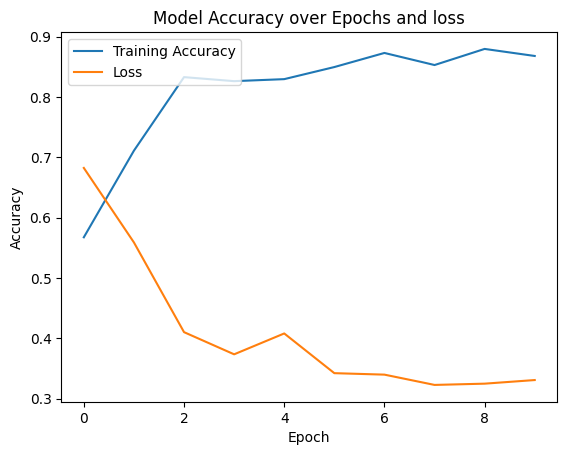

In [67]:
import matplotlib.pyplot as plt

# Train the model and save the history of accuracy over epochs
# Plot the accuracy history over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy over Epochs and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Loss'], loc='upper left')
plt.show()

In [89]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [ModelCheckpoint(filepath='best_model_1.h5', monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=7)]

model.fit(x_train, y_train, epochs=epochs,
                    callbacks=callbacks,
                    validation_data=(x_test, y_test))


Epoch 1/15
29/29 [==============================] - 30s 963ms/step - loss: 0.5967 - accuracy: 0.6726 - val_loss: 0.6932 - val_accuracy: 0.7071
Epoch 2/15
29/29 [==============================] - 24s 834ms/step - loss: 0.4106 - accuracy: 0.8091 - val_loss: 0.4411 - val_accuracy: 0.8182
Epoch 3/15
29/29 [==============================] - 26s 878ms/step - loss: 0.3707 - accuracy: 0.8435 - val_loss: 0.4640 - val_accuracy: 0.8182
Epoch 4/15
29/29 [==============================] - 25s 878ms/step - loss: 0.3334 - accuracy: 0.8613 - val_loss: 0.3287 - val_accuracy: 0.8384
Epoch 5/15
29/29 [==============================] - 26s 891ms/step - loss: 0.2893 - accuracy: 0.8879 - val_loss: 0.3533 - val_accuracy: 0.8384
Epoch 6/15
29/29 [==============================] - 25s 850ms/step - loss: 0.2796 - accuracy: 0.8901 - val_loss: 0.2892 - val_accuracy: 0.8788
Epoch 7/15
29/29 [==============================] - 28s 976ms/step - loss: 0.2307 - accuracy: 0.9134 - val_loss: 0.2613 - val_accuracy: 0.8990

In [34]:
model.save('best_model_7.h5')

In [11]:
model = keras.models.load_model('./best_model_1.h5')

In [10]:
model.evaluate(x_test, y_test)

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [92]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.44090786576271057
Test accuracy: 0.8585858345031738


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))
print(confusion_matrix(y_true_labels, y_pred_labels))

4/4 [==============================] - 1s 145ms/step
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        50
           1       0.79      0.98      0.87        49

    accuracy                           0.86        99
   macro avg       0.88      0.86      0.86        99
weighted avg       0.88      0.86      0.86        99

[[37 13]
 [ 1 48]]


In [31]:
import numpy as np
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from keras import models
import pandas as pd
import os

In [32]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

opencv_frame_0.png written!
opencv_frame_1.png written!
Escape hit, closing...


In [41]:


# Load the saved model
# Define a function to make predictions
def predict_mask(image):

    frame = cv2.imread(image)
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (100,100))

    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Resize the image to the correct dimensions (if necessary)
    image_array = np.resize(image_array, (1, 100, 100))
    
    # Normalize the image data
    image_array = image_array / 255.0
    print(image_array.shape)
    
    # Make a prediction with the model
    prediction = model.predict(image_array)
    print(prediction)
    
    # Return the prediction
    return prediction[0][0] > 0.5  # Returns True if wearing mask, False if not

# Example usage
image = 'New_Masks_Dataset/Test/Mask/2085.jpg'
image = 'New_Masks_Dataset/Test/Non_Mask/real_01032.jpg'
# image = 'New_Masks_Dataset/Test/Mask/2114.jpeg'
# image = 'New_Masks_Dataset/Test/Non_Mask/real_01042.jpg'
# image = 'mask.png'
# image = 'no_mask.png'
# image = 'opencv_frame_0.png'
# image = 'opencv_frame_1.png'

# image = "New_Masks_Dataset/Test/Non_Mask/real_01073.jpg"
# folder = 'New_Masks_Dataset/Test/Non_Mask'
# for image in os.listdir(folder):
prediction = predict_mask(image)
print(prediction)

(1, 100, 100)
1/1 [==============================] - 0s 45ms/step
[[0.6622422  0.32864696]]
True
